In [195]:
import pandas as pd
import matplotlib.pyplot as plt

# https://docs.google.com/document/d/1LL4WSKmWF8637Fn9xz0GPnytO0-4xYwyy1hQJUpmsmY/edit?usp=sharing 

In [196]:
source = 'Version1.csv'

In [261]:
data = pd.read_csv(source)
pretty_cols = list(data.columns)
pretty_cols[0] = "Rise Time (ms)"
print(pretty_cols)
easy_cols = ['rise', 'rate', 'ie', 'p', 'p_observed', 'peep', 'compliance', 'resistance', 'tv', 'flow']
dependant = ['p_observed', 'tv', 'flow']
independant = [c for c in easy_cols if c not in dependant]
data.columns = easy_cols #[pretty_cols]
print(f"dependant {dependant}, independant {independant}")
data.sort_values(independant, inplace=True)
display(data.head())

['Rise Time (ms)', 'Respiratory Rate (breaths/min)', 'I:E Ratio', 'Target Peak Pressure (cm H2O)', 'Observed Peak Pressure (cm H2O)', 'PEEP (cm H2O)', 'Lung Compliance (mL / cm H2O)', 'Airway Resistance (cm H2O / (L/s) )', 'Tidal Volume (mL)', 'Flow (L/min)']
dependant ['p_observed', 'tv', 'flow'], independant ['rise', 'rate', 'ie', 'p', 'peep', 'compliance', 'resistance']


,rise,rate,ie,p,p_observed,peep,compliance,resistance,tv,flow
17,0,12,2,20,15.667592,5,10,3,156.658474,47.425070
32,0,12,2,20,15.137525,5,10,5,151.333968,43.565734
47,0,12,2,20,14.607625,5,10,10,145.922050,38.088524
62,0,12,2,20,14.514685,5,10,20,144.334189,34.960113
2,0,12,2,20,14.520230,5,25,1,362.849229,52.815074


In [265]:
# These are our variables:
for i in independant:
    if len(data[i].unique()) > 1:
        values = data[i].unique()
        values.sort()
        print(f"{i} {values}" )

rise [   0  250  500 1000 2000]
rate [12 20 30]
compliance [ 10  25  50 100 200]
resistance [ 1  3  5 10 20]


In [256]:
def describe(data):
    print(f" {len(data.columns)} x {len(data)}")

In [257]:
# a function to extract the data for set of conditions
# makes use of the panda.query method
def get(data, filters):
     # rise = 0, rate = 12, ie = 2, p = 20, peep = 5, compliance = 100, resistance = 3
    query = ' & '.join([f"{c} == {v}" for c, v in filters.items()])
    # print (query)
    return data.query(query)

In [258]:
plt.rcParams['figure.figsize'] = [16, 16]
def sub_plot(data, filter_in, ax, series='rise', subseries='compliance', dependant='tv', title=''):
    filter = filter_in.copy()
    del filter[series]
    del filter[subseries]
    all_rows = get(data, filter)
    clean = all_rows.drop_duplicates(subset=[series, subseries], ignore_index=True, keep='first')
    if len(all_rows) > len(clean):
        print(f"WARNING went from {len(all_rows)} to {len(clean)} rows are cleaning {filter} (This shouldn't really be happening!)")
    df1 = clean.pivot(index=series, columns=subseries, values=dependant)
    df1.plot(ax=ax, title=title)

['rise', 'rate', 'compliance', 'resistance'] Rows = compliance, Cols = rate, X=rise, series=resistance 
WARNING went from 25 to 24 rows are cleaning {'rate': 12, 'ie': 2, 'p': 20, 'peep': 5, 'compliance': 10}
WARNING went from 26 to 25 rows are cleaning {'rate': 20, 'ie': 2, 'p': 20, 'peep': 5, 'compliance': 10}
WARNING went from 26 to 25 rows are cleaning {'rate': 30, 'ie': 2, 'p': 20, 'peep': 5, 'compliance': 10}
WARNING went from 26 to 25 rows are cleaning {'rate': 12, 'ie': 2, 'p': 20, 'peep': 5, 'compliance': 25}
['rise', 'rate', 'resistance', 'compliance'] Rows = resistance, Cols = rate, X=rise, series=compliance 
WARNING went from 26 to 24 rows are cleaning {'rate': 12, 'ie': 2, 'p': 20, 'peep': 5, 'resistance': 1}
WARNING went from 26 to 25 rows are cleaning {'rate': 20, 'ie': 2, 'p': 20, 'peep': 5, 'resistance': 1}
WARNING went from 26 to 25 rows are cleaning {'rate': 30, 'ie': 2, 'p': 20, 'peep': 5, 'resistance': 1}
['rise', 'resistance', 'compliance', 'rate'] Rows = complian

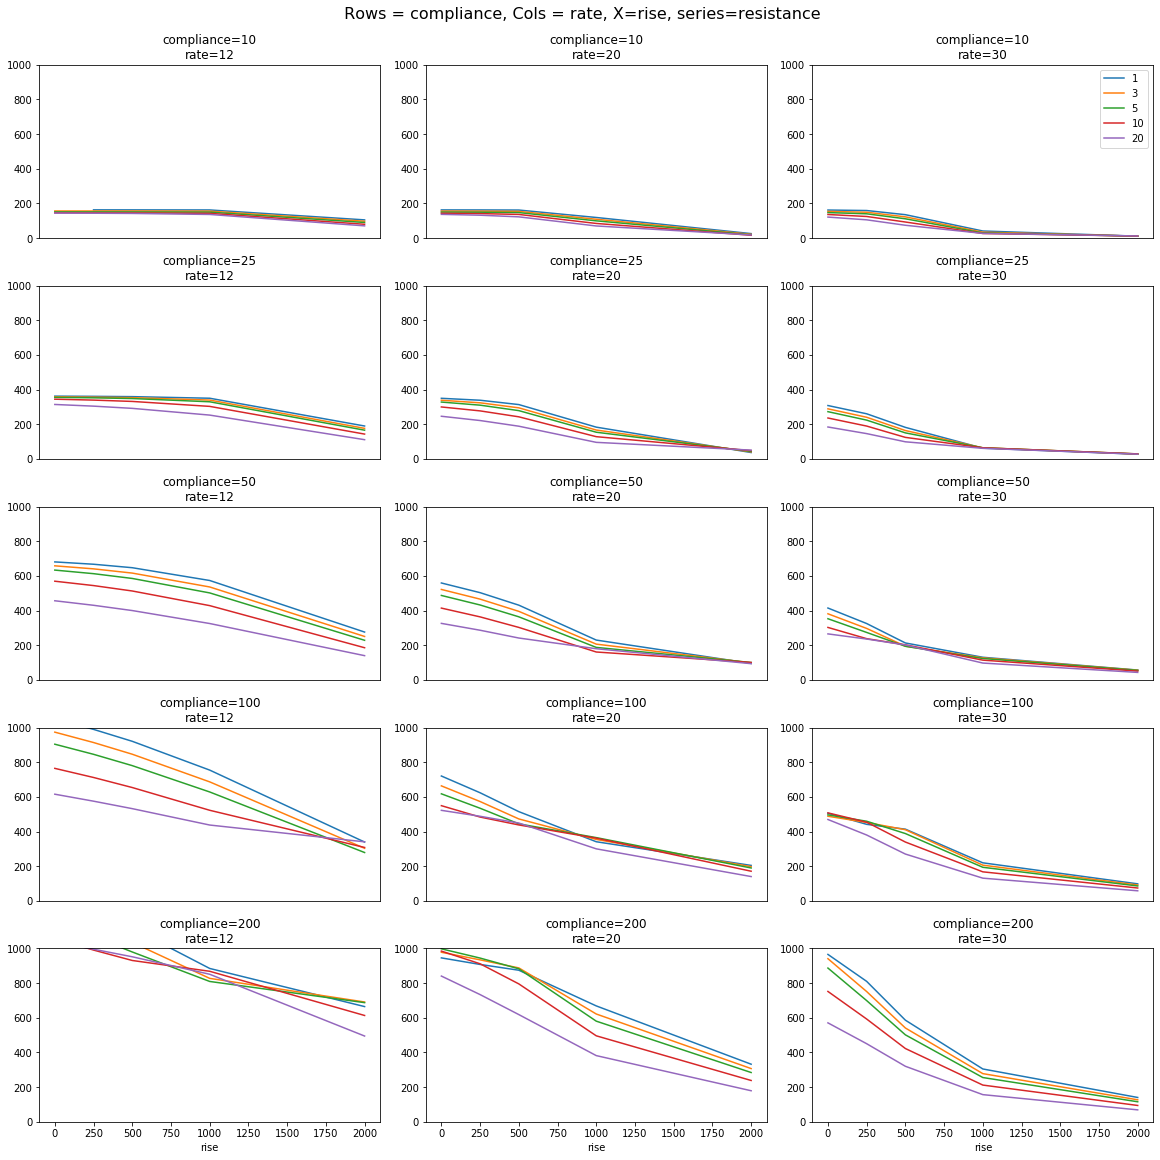

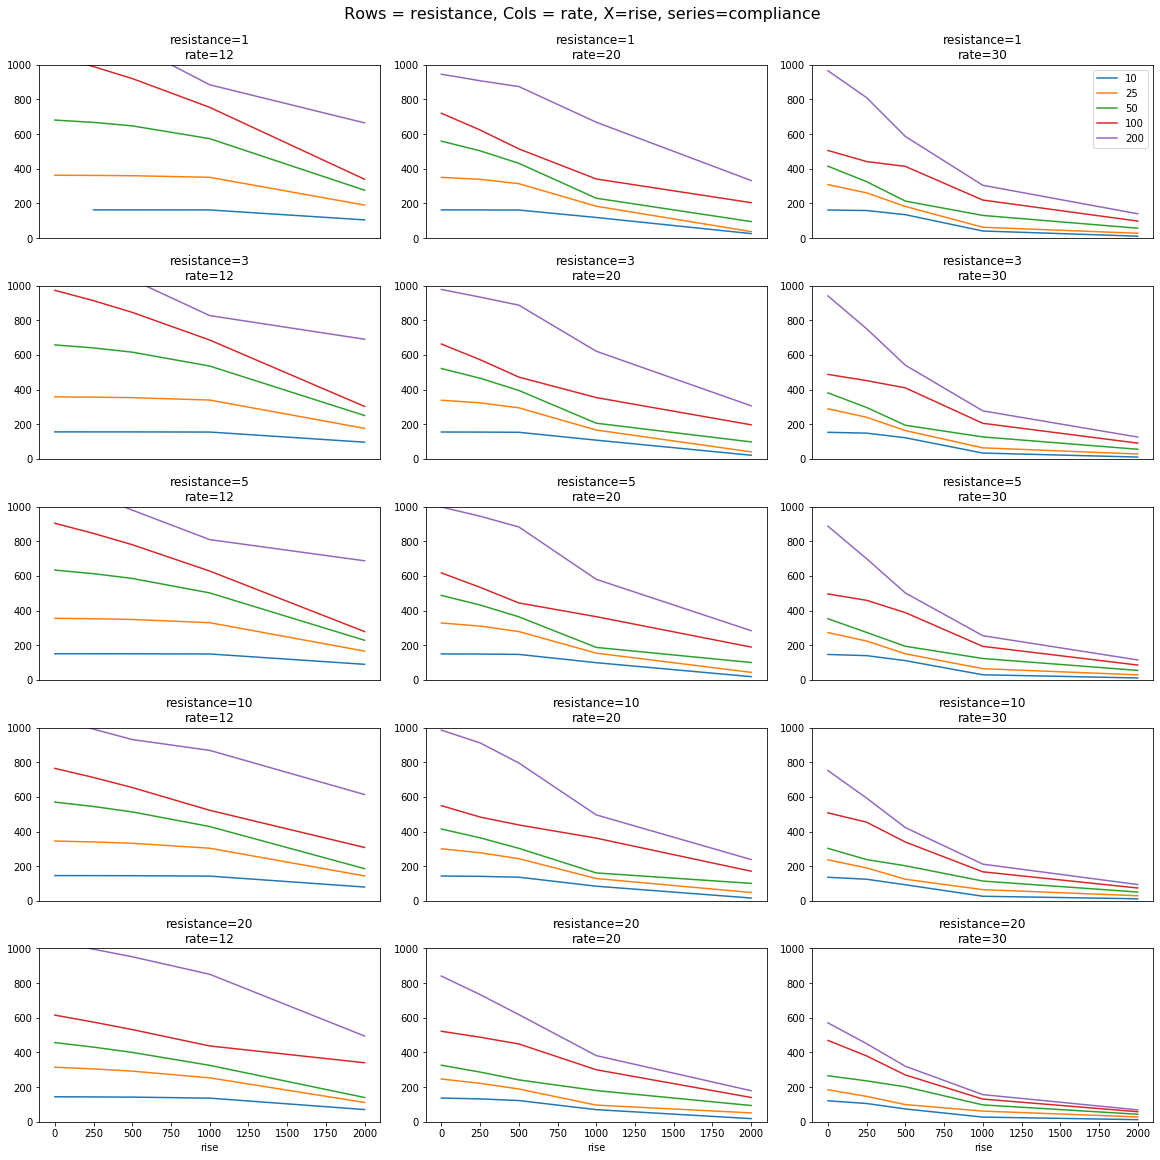

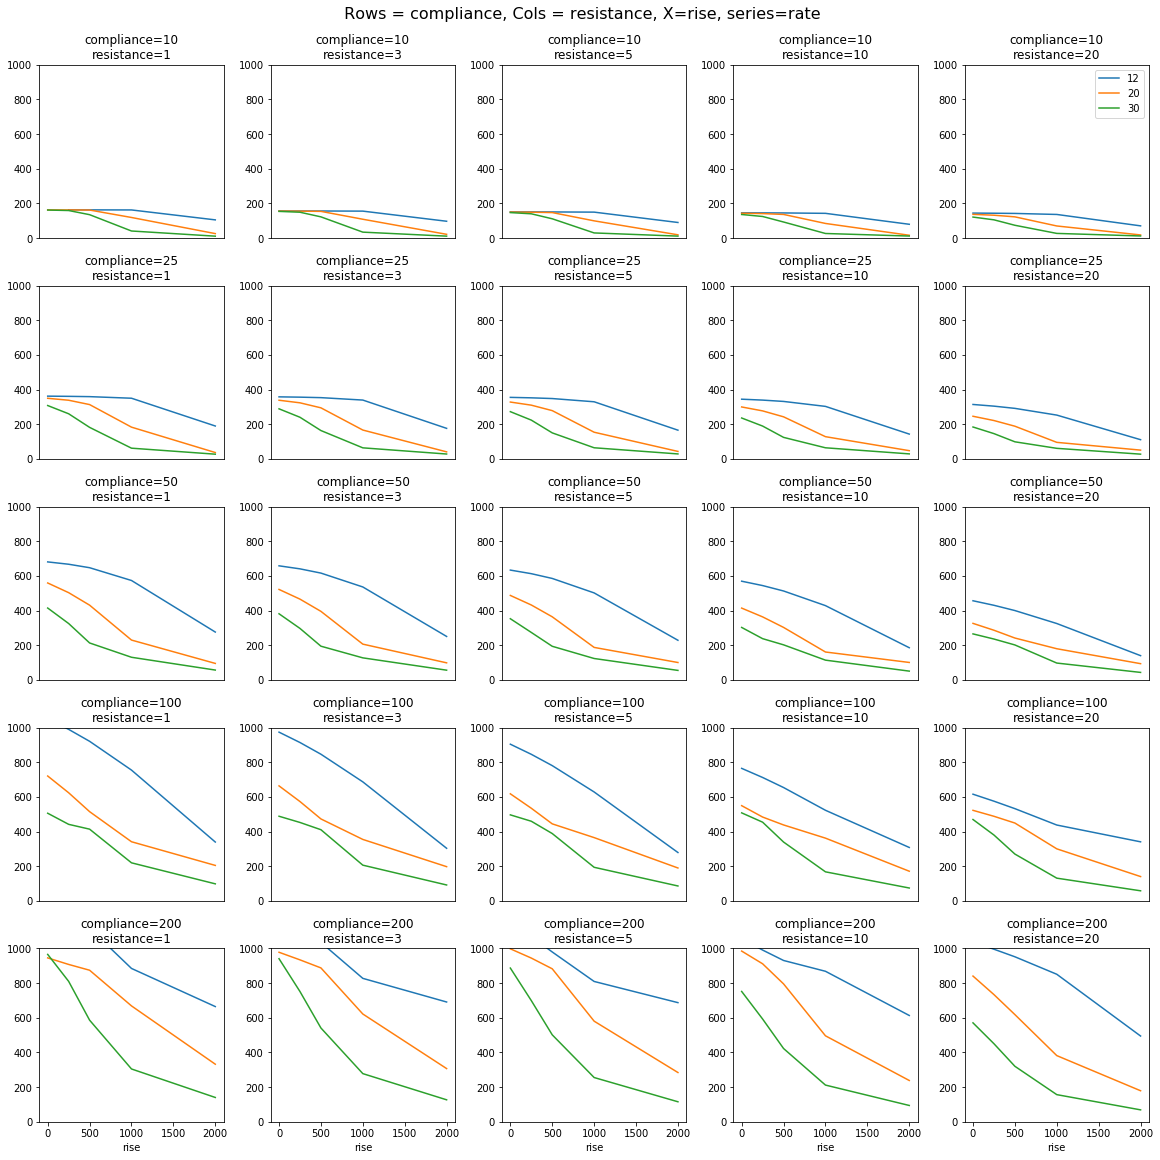

In [266]:

def plot_matrix(data, vars):
    base_filter = {"rise": 0, "rate": 12, "ie": 2, "p": 20, "peep": 5, "compliance": 100, "resistance": 3}
    xvar = vars[2]
    yvar = vars[1]
    svar = vars[0]
    ssvar = vars[3]
    print(f"{vars} Rows = {xvar}, Cols = {yvar}, X={svar}, series={ssvar} ")
    
    xs = data[xvar].unique()
    ys = data[yvar].unique()
    xs.sort()
    ys.sort()
    fig, axes = plt.subplots(nrows=len(xs), ncols=len(ys), constrained_layout=True)
    fig.suptitle(f" Rows = {xvar}, Cols = {yvar}, X={svar}, series={ssvar}", fontsize=16)
    for xi, x in enumerate(xs):
        for yi, y in enumerate(ys):
            # print(f"{xi}, {yi} {xvar}={x}\n{yvar}={y}, {svar}, {ssvar}")
            title = f"{xvar}={x}\n{yvar}={y}"
            filter = base_filter.copy()
            filter[xvar] = x
            filter[yvar] = y
            # print(filter)
            ax = axes[xi, yi]
            ax.set_ylim(0, 1000)
            if len(xs) - xi > 1:
                # hiding x marks
                ax.xaxis.label.set_visible(False)
                ax.get_xaxis().set_visible(False)
            if yi > 0:
                # hiding yx marks
                ax.yaxis.label.set_visible(False)
                ax.get_yaxis().set_visible(False)
            sub_plot(data, filter, ax, series=svar, subseries=ssvar, title=title)
            if xi == 0 and len(ys) - yi == 1:
                ax.legend(loc='upper right')
            else:
                # hiding legend!
                ax.legend().set_visible(False)

plot_matrix(data, ['rise', 'rate', 'compliance', 'resistance'])
plot_matrix(data, ['rise', 'rate', 'resistance', 'compliance',])
plot_matrix(data, ['rise', 'resistance', 'compliance','rate' ])